In [2]:
import pandas as pd

df_bank = pd.read_csv("./dataset/BankCustomer.csv")
df_bank.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


/var/folders/bs/c1rv5w6n0cn77fp62sj3hzhh0000gp/T/ipykernel_10098/3824627463.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i + 1)


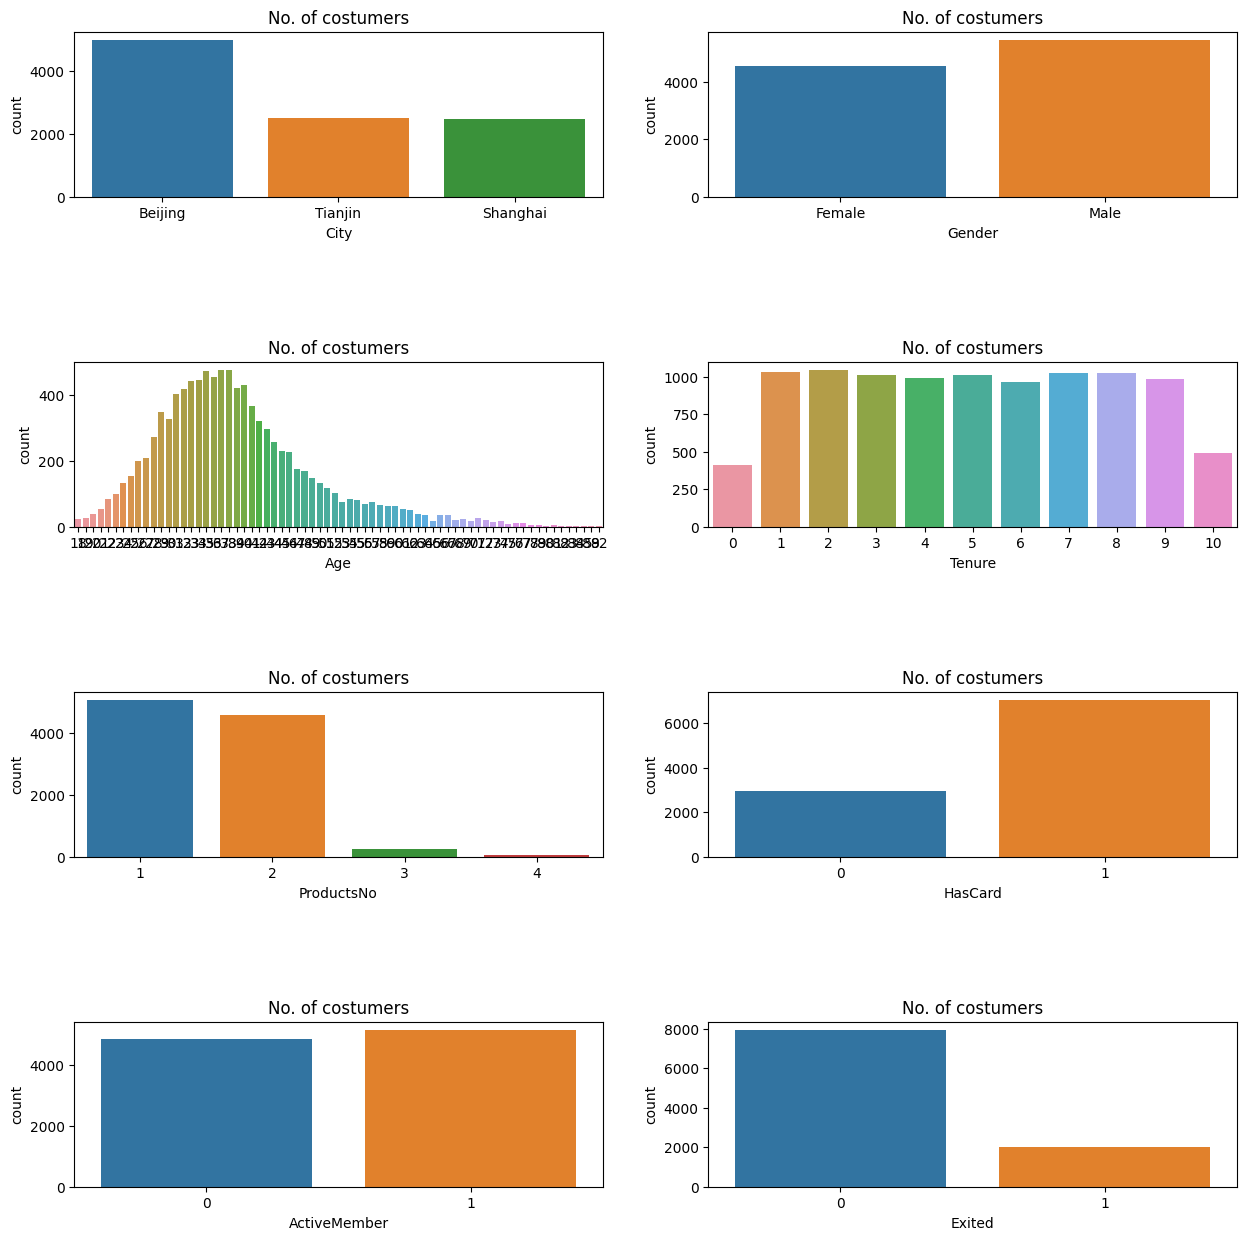

In [3]:
import matplotlib.pyplot as plt  #导入matplotlib画图工具箱
import seaborn as sns  #导入seaborn画图工具箱

# 显示不同特征的分布情况
features = ['City', 'Gender', 'Age', 'Tenure',
            'ProductsNo', 'HasCard', 'ActiveMember', 'Exited']
fig = plt.subplots(figsize=(15, 15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i + 1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=df_bank)
    plt.title("No. of costumers")

In [4]:
# 把二元类别文本数字化
df_bank['Gender'].replace("Female", 0, inplace=True)
df_bank['Gender'].replace("Male", 1, inplace=True)
# 显示数字类别
print("Gender unique values", df_bank['Gender'].unique())
# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
d_city = pd.get_dummies(df_bank['City'], prefix="City")
df_bank = [df_bank, d_city]
df_bank = pd.concat(df_bank, axis=1)
# 构建特征和标签集合
y = df_bank['Exited']
X = df_bank.drop(['Name', 'Exited', 'City'], axis=1)
X.head()  #显示新的特征集

Gender unique values [0 1]


,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,0,40,9,2,0,1,516,6360.66,0.0000,True,False,False
1,1,69,6,2,0,1,682,28605.00,0.0000,True,False,False
2,0,32,9,1,1,1,803,10378.09,236311.0932,True,False,False
3,0,37,0,2,1,1,778,25564.01,129909.8079,False,False,True
4,1,55,4,3,1,0,547,3235.61,136976.1948,False,False,True


In [5]:
from sklearn.model_selection import train_test_split  # 拆分数据集

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [6]:
# 对多棵决策树进行Bagging，即树的聚合
from sklearn.ensemble import BaggingClassifier  # 导入Bagging分类器
from sklearn.tree import DecisionTreeClassifier  # 导入决策树分类器
from sklearn.metrics import (f1_score, confusion_matrix)  # 导入评估标准

dt = DecisionTreeClassifier()  # 只使用一棵决策树
dt.fit(X_train, y_train)  # 拟合模型
y_pred = dt.predict(X_test)  # 进行预测
print("决策树测试准确率: {:.2f}%".format(dt.score(X_test, y_test) * 100))
print("决策树测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))
bdt = BaggingClassifier(DecisionTreeClassifier())  #树的Bagging
bdt.fit(X_train, y_train)  # 拟合模型
y_pred = bdt.predict(X_test)  # 进行预测
print("决策树Bagging测试准确率: {:.2f}%".format(bdt.score(X_test, y_test) * 100))
print("决策树Bagging测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))

决策树测试准确率: 79.30%
决策树测试F1分数: 50.83%
决策树Bagging测试准确率: 85.00%
决策树Bagging测试F1分数: 55.88%


In [7]:
from sklearn.model_selection import GridSearchCV  # 导入网格搜索工具

# 使用网格搜索优化参数
bdt_param_grid = {
    '9.3.1 Ada Boost算法_estimator__max_depth': [5, 10, 20, 50, 100],
    'n_estimators': [1, 5, 10, 50]}
bdt_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),
                      param_grid=bdt_param_grid, scoring='f1',
                      n_jobs=10, verbose=1)
bdt_gs.fit(X_train, y_train)  # 拟合模型
bdt_gs = bdt_gs.best_estimator_  # 最佳模型
y_pred = bdt.predict(X_test)  # 进行预测
print("决策树Bagging测试准确率: {:.2f}%".format(bdt_gs.score(X_test, y_test) * 100))
print("决策树Bagging测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for mo

决策树Bagging测试准确率: 86.00%
决策树Bagging测试F1分数: 55.88%


In [8]:
from sklearn.ensemble import RandomForestClassifier  # 导入随机森林分类器

rf = RandomForestClassifier()  # 随机森林模型
# 使用网格搜索优化参数
rf_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [True, False],
                 "n_estimators": [100, 300],
                 "criterion": ["gini"]}
rf_gs = GridSearchCV(rf, param_grid=rf_param_grid,
                     scoring="f1", n_jobs=10, verbose=1)
rf_gs.fit(X_train, y_train)  # 拟合模型
rf_gs = rf_gs.best_estimator_  # 最佳模型
y_pred = rf_gs.predict(X_test)  # 进行预测
print("随机森林测试准确率: {:.2f}%".format(rf_gs.score(X_test, y_test) * 100))
print("随机森林测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
随机森林测试准确率: 86.35%
随机森林测试F1分数: 59.68%


In [9]:
from sklearn.ensemble import ExtraTreesClassifier  # 导入极端随机森林模型

ext = ExtraTreesClassifier()  # 极端随机森林模型
# 使用网格搜索优化参数
ext_param_grid = {"max_depth": [None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [True, False],
                  "n_estimators": [100, 300],
                  "criterion": ["gini"]}
ext_gs = GridSearchCV(ext, param_grid=ext_param_grid, scoring="f1",
                      n_jobs=4, verbose=1)
ext_gs.fit(X_train, y_train)  # 拟合模型
ext_gs = ext_gs.best_estimator_  # 最佳模型
y_pred = ext_gs.predict(X_test)  # 进行预测
print("更多树测试准确率: {:.2f}%".format(ext_gs.score(X_test, y_test) * 100))
print("更多树测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
更多树测试准确率: 86.05%
更多树测试F1分数: 58.54%


9.3.1 Ada Boost算法

In [10]:
from sklearn.ensemble import AdaBoostClassifier  # 导入AdaBoost模型

dt = DecisionTreeClassifier()  # 选择决策树分类器作为AdaBoost的基准算法
ada = AdaBoostClassifier(dt)  # AdaBoost模型
# 使用网格搜索优化参数
ada_param_grid = {"base_estimator__criterion": ["gini", "entropy"],
                  "base_estimator__splitter": ["best", "random"],
                  "base_estimator__random_state": [7, 9, 10, 12, 15],
                  "algorithm": ["SAMME", "SAMME.R"],
                  "n_estimators": [1, 2, 5, 10],
                  "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}
ada_gs = GridSearchCV(ada, param_grid=ada_param_grid,
                      scoring="f1", n_jobs=10, verbose=1)
ada_gs.fit(X_train, y_train)  # 拟合模型
ada_gs = ada_gs.best_estimator_  # 最佳模型
y_pred = ada_gs.predict(X_test)  # 进行预测
print("Adaboost测试准确率: {:.2f}%".format(ada_gs.score(X_test, y_test) * 100))
print("Adaboost测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring 

Adaboost测试准确率: 79.40%
Adaboost测试F1分数: 50.84%


/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring 

9.3.2 梯度提升算法

In [11]:
from sklearn.ensemble import GradientBoostingClassifier  # 导入梯度提升分类器

gb = GradientBoostingClassifier()  # 梯度提升分类器
# 使用网格搜索优化参数
gb_param_grid = {'loss': ["deviance"],
                 'n_estimators': [100, 200, 300],
                 'learning_rate': [0.1, 0.05, 0.01],
                 'max_depth': [4, 8],
                 'min_samples_leaf': [100, 150],
                 'max_features': [0.3, 0.1]}
gb_gs = GridSearchCV(gb, param_grid=gb_param_grid,
                     scoring="f1", n_jobs=10, verbose=1)
gb_gs.fit(X_train, y_train)  # 拟合模型
gb_gs = gb_gs.best_estimator_  # 最佳模型
y_pred = gb_gs.predict(X_test)  # 进行预测
print("梯度提升测试准确率: {:.2f}%".format(gb_gs.score(X_test, y_test) * 100))
print("梯度提升测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/cag2050/Documents/PycharmProjects/zero_basic_

梯度提升测试准确率: 86.50%
梯度提升测试F1分数: 60.41%


9.3.3 XGBoost算法

In [12]:
from xgboost import XGBClassifier  # 导入XGB分类器

xgb = XGBClassifier()  # XGB分类器
# 使用网格搜索优化参数
xgb_param_grid = {'min_child_weight': [1, 5, 10],
                  'gamma': [0.5, 1, 1.5, 2, 5],
                  'subsample': [0.6, 0.8, 1.0],
                  'colsample_bytree': [0.6, 0.8, 1.0],
                  'max_depth': [3, 4, 5]}
xgb_gs = GridSearchCV(xgb, param_grid=xgb_param_grid,
                      scoring="f1", n_jobs=10, verbose=1)
xgb_gs.fit(X_train, y_train)  # 拟合模型
xgb_gs = xgb_gs.best_estimator_  # 最佳模型
y_pred = xgb_gs.predict(X_test)  # 进行预测
print("XGB测试准确率: {:.2f}%".format(xgb_gs.score(X_test, y_test) * 100))
print("XGB测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
XGB测试准确率: 86.45%
XGB测试F1分数: 60.55%


In [13]:
from sklearn.ensemble import VotingClassifier  # 导入Voting分类器

# 把各种模型的分类结果进行Voting，同学们还可以加入更多模型如SVM，kNN等
voting = VotingClassifier(estimators=[('rf', rf_gs),
                                      ('gb', gb_gs),
                                      ('ext', ext_gs),
                                      ('xgb', xgb_gs),
                                      ('ada', ada_gs)],
                          voting='soft', n_jobs=10)
voting = voting.fit(X_train, y_train)  # 拟合模型
y_pred = voting.predict(X_test)  # 进行预测
print("Voting测试准确率: {:.2f}%".format(voting.score(X_test, y_test) * 100))
print("Voting测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))

/Users/cag2050/Documents/PycharmProjects/zero_basic_machine_learning/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Voting测试准确率: 86.55%
Voting测试F1分数: 60.38%
